# Introduction

The Canidae family consists of three subfamilies (Hesperocyoninae, Borophaginae, and Caninae) with a fossil record spanning the past 40 million years (Finarelli et al. 2007). There exists more than 120 fossil taxa consisting of these three subfamilies. The Hesperocyoninae and Borophaginae subfamilies are both entirely extinict; all extant species belong to the Caninae subfamily (Finarelli 2013). Canids are found on every continent except Antartica and can vary in size from a few pounds to over a hundred pounds (Keliman 1967). This diversity is due to a lack of specialization and a strong ability to adapt to various environments.

    Finarelli, John A., and Anjali Goswami. “Potential Pitfalls of Reconstructing Deep Time Evolutionary History With Only Extant Data, A Case Study Using The Canidae (Mammalia, Carnivora).” Evolution, vol. 67, no. 12, 2013, pp. 3678–3685.

    Finarelli, John A., et al. “Mechanisms behind Active Trends in Body Size Evolution of the Canidae (Carnivora: Mammalia).” The American Naturalist, vol. 170, no. 6, 2007, pp. 876–885.
    
    Kleiman, Devra G. “Some Aspects of Social Behavior in the Canidae.” American Zoologist, vol. 7, no. 2, 1967, pp. 365–372.

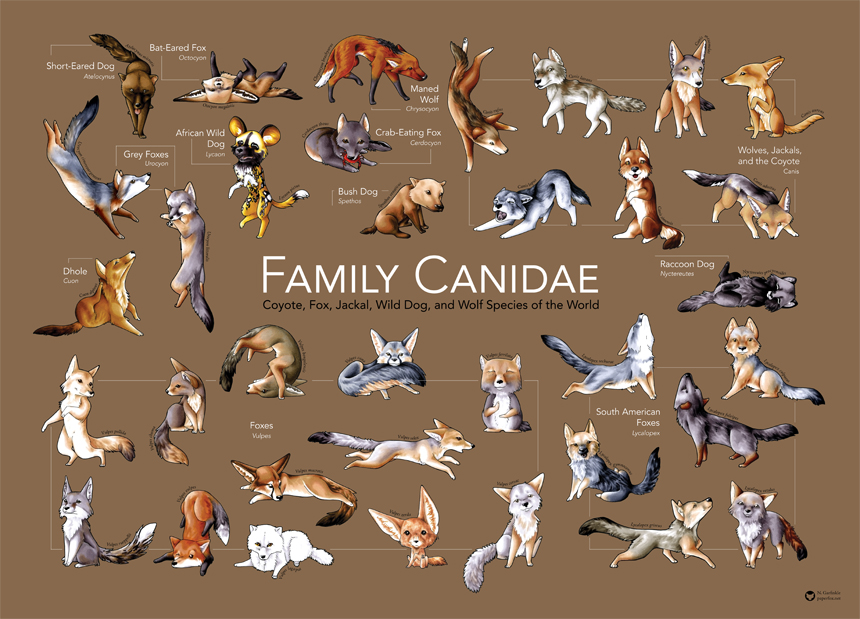

In [4]:
from IPython.display import Image
Image(filename = "canidae.png")

# The following was done in the shell terminal:

I downloaded the files from paleobiology database into my downloads file. I then moved it into my final project folder:

    cp ~/Downloads/pbdb_data.csv ~/Desktop/EEB-177/eeb-174-final-project

I then renamed it so that it would be easier to identify the species I was working with:

    mv pbdb_data.csv Canidae_data.csv

I then checked the number of unique species using:

    tail -n +19 Canidae_data.csv | cut -d "," f 6 | sort | uniq | wc -l

# The following was done in the Python Notebook:

### Made a dictionary containing the name of the species and the age of the fossil

In [14]:
# Making a dictionary for Canidae
def makeCanidaeDict(filename):
    Canidae_dict = {} # Creates an empty dictionary 
    Canidae_species = open(filename, "r", encoding = "ISO-8859-15") # Will open the data file
    Canidae_records = Canidae_species.readlines()[19:] # This will read the file after line 19 which excludes the heading
    for line in Canidae_records:
        line = line.replace('\"', '') # Removes the extra quotes
#         #line = line.replace('\'', '')
        record_elements = line.split(",") # Denotes that each record element is separated by a file
        species = record_elements[5] # Making species be the keys and taking the names from column 5
        max_age = float(record_elements[14]) # Assigning max age to column 14
        min_age = float(record_elements[15]) # Assigning min age to column 15
        #age = max_age
        age = max_age - min_age # Calculating the age of the fossil
        Canidae_dict[species] = age # Assigning the age as the values in the dictionary
        #print(record_elements)
    return Canidae_dict

### Made a dictionary containing the name of the species and the first occurance of the fossil

In [11]:
# Make a dictionary for the species and first occurance 
#sorted(mydict.items(), key=lambda x: x[1]) #sorts the dictionary numerically by values
def FirstOccurance(filename):
    firstOccurance_dict = {} # Create an empty dictionary 
    species_data = open(filename, "r", encoding = "ISO-8859-15") # Open file
    firstOccurance_records = species_data.readlines()[19:] # Read the file
    for line in firstOccurance_records:
        line = line.replace('\"', '') 
        firstOccurance_elements = line.split(",")
        species = firstOccurance_elements[5] # Populate the species with the data in column 6
        start_year = float(firstOccurance_elements[14]) # Populate the start year with data from column 15
        firstOccurance_dict[species] = start_year # Assign species as keys and start year as values
    return firstOccurance_dict

fo_dict = FirstOccurance("Canidae_data.csv") 

### Made a dictionary containing the name of the species and the last occurance of the fossil

In [12]:
# Create a dictionary of last occurances
def LastOccurance(filename):
    lastOccurance_dict = {} # Crete an empty dictionary 
    rspecies_data = open(filename, "r", encoding = "ISO-8859-15") # Open file
    lastOccurance_records = rspecies_data.readlines()[19:] # Read the file
    for line in lastOccurance_records:
        line = line.replace('\"', '') 
        lastOccurance_elements = line.split(",")
        species = lastOccurance_elements[5] # Populate the species with the data in column 6
        end_year = float(lastOccurance_elements[15]) # Populate the end year with data from column 16 
        lastOccurance_dict[species] = end_year # Assign species as keys and end year as values
    return lastOccurance_dict

lo_dict = LastOccurance("Canidae_data.csv")

### Made a dictionary containing the name of the species as well as both the first and last occurances

In [13]:
# Create a combined dictionary in which each key (species) has both first and last occurances as values
from collections import defaultdict

combined_dict = defaultdict(list) # Create lists for values within dictionary

for d in (fo_dict, lo_dict):
    for key, value in d.items():
        combined_dict[key].append(value) # Append both values as a list for each key in a new combined dictionary

combined_dict

defaultdict(list,
            {'Aelurodon ? sp.': [13.6, 4.9],
             'Aelurodon asthenostylus': [15.97, 13.6],
             'Aelurodon cf. ferox': [15.97, 13.6],
             'Aelurodon cf. taxoides': [13.6, 10.3],
             'Aelurodon cf. wheelerianus': [20.43, 15.97],
             'Aelurodon ferox': [15.97, 13.6],
             'Aelurodon mcgrewi': [15.97, 13.6],
             'Aelurodon n. sp. mcgrewi': [15.97, 13.6],
             'Aelurodon n. sp. montanensis': [15.97, 13.6],
             'Aelurodon sp.': [13.6, 10.3],
             'Aelurodon stirtoni': [15.97, 13.6],
             'Aelurodon taxoides': [13.6, 10.3],
             'Aenocyon ayersi': [0.126, 0.0117],
             'Aenocyon ayersi ?': [2.588, 0.0117],
             'Aenocyon cf. ayersi': [0.126, 0.0117],
             'Aenocyon cf. dirus': [0.126, 0.0117],
             'Aenocyon dirus': [0.126, 0.0117],
             'Aenocyon sp.': [0.126, 0.0117],
             'Alopex cf. lagopus': [1.8, 0.3],
             'Alop

### Creating a CSV file to be used in RStudio

In [22]:
## Open the file

infile = "Canidae_data.csv"
with open(infile, 'r') as ff:
    canid_recs = ff.readlines()[1:]

In [23]:
# Make dictionary
from collections import defaultdict

species_range = defaultdict(list)

for line in canid_recs:
    species = line.split(",")[5]
    minage = line.split('","')[10]
    maxage = line.split('","')[11]
    
    mean_age = (float(minage) + float(maxage)) / 2
    
    # Add species as keys and mean ages as elements to the list of ages 
    species_range[species].append(mean_age)

In [24]:
output = open("Canidae-ranges.csv", "w")

for key in species_range.keys():
    ages = species_range[key]
    minage = min(ages)
    maxage = max(ages)
    genus = key.split(" ")[0]
    species = key
    outline = "{},{},{},{}\n".format(genus, species, minage, maxage)
    output.write(outline)

# The following was done in RStudio:

### Read in the file
```{r}
# Read in the file
library(ggplot2)
setwd("/home/eeb177-student/Desktop/EEB-177/eeb-174-final-project/project-deadline-6/")

canids <- read.csv("/home/eeb177-student/Desktop/EEB-177/eeb-174-final-project/project-deadline-6/Canidae-ranges.csv", header =F, as.is = T)

names(canids) <- c("genus", "species", "minage", "maxage")
head(canids)
```

### Create the graph
```{r}
Canidae_occ <- ggplot(canids, aes( species, ymin = maxage, ymax=minage, colour = genus))
Canidae_occ <- Canidae_occ + geom_linerange()
# Remove the legend
Canidae_occ <- Canidae_occ + theme(legend.position="none") 
# Flip axis
Canidae_occ <- Canidae_occ + coord_flip() 
# Change text size
Canidae_occ <- Canidae_occ +  theme(axis.text.y = element_text(size=3)) 
# Remove tick marks on y-axis
Canidae_occ <- Canidae_occ + theme(axis.ticks.y=element_blank()) 
# Remove excess white space
Canidae_occ <- Canidae_occ + scale_y_continuous(limits=c(0, 40), expand = c(0, 0), breaks=c(0, 10, 20, 30, 40)) 
# Add title and labels
Canidae_occ <- Canidae_occ + labs(title = "Canidae Fossil Occurrences", x = "Species", y = "Ma ago") + theme(plot.title = element_text(hjust = 0.5, size=22, face = "bold"), axis.title =element_text(size=20))  
Canidae_occ
```

### Save the graphs as a pdf
```{r}
ggsave(filename = "Canidae-occ.pdf", plot = Canidae_occ)
```

## Link to Github: https://github.com/Jeffrey-Lee1797/eeb-174-final-project

In [25]:
from IPython.display import IFrame
IFrame("Canidae-occ.pdf", width = 1000, height = 2000)